out count:	630
in count:	371


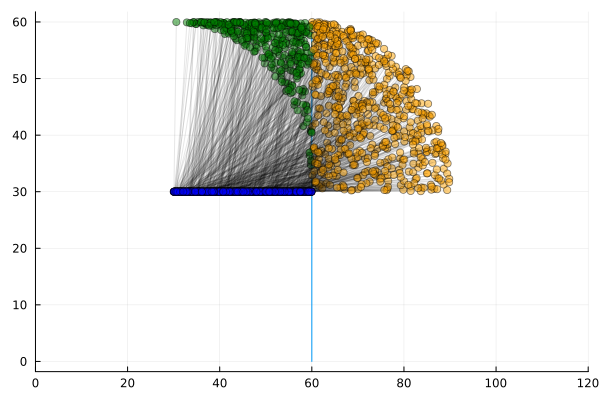

passed build big line


In [45]:
#=
Monte_Carlo_π
Kata
MIT license copyright Dr Keith S Reid 2023
Intent: dropped matchsticks model approximation of π
=#

# s.0 Packages

using Plots
using Test

# s.1 Config

function get_repeats()
    repeats::UInt64 = 1000
    return repeats
end

function get_size_big_line()
    size::UInt64    = 60
    return size
end

function get_size_small_line()
    size::UInt64    = 30
    return size
end


# s.2 Structs

# s.3 Model

function build_big_line(size)
    big_line::Vector{Vector{Float64}} = [[size,0],[size,size]]
    return big_line
end

# s.4 View

function tell_repeats(repeats)
    println("This many repeats:\t", repeats)
end

# s.5 Control
function monte_carlo_π_main()
    
    repeats             = get_repeats()
    size_big_line       = get_size_big_line()    
    big_line            = build_big_line(size_big_line)
    mid_point           = [size_big_line,size_big_line/2]
    size_small_line     = get_size_small_line()
    π_graph             = plot([size_big_line,size_big_line],[0,size_big_line], legend=:false, xlims=(0,2*size_big_line))
    
    out_count           = 0
    in_count            = 1
    
    for repeats in 1:repeats
        
        start_x::Float64    = mid_point[1] - (rand() * size_small_line)
        start_y::Float64    = mid_point[2] 
        small_start         = [start_x, start_y]
        
        degree              = rand()*90
        stop_right          = cosd(degree) * size_small_line # sine equals adjacent over hypoteneuse
        stop_up             = sind(degree) * size_small_line # sine equals opposite over hypoteneuse
        
        small_step          =   [stop_right, stop_up]
        small_stop          = .+(small_start, small_step)

        graph               = scatter!(π_graph, [small_start[1]],    [small_start[2]], color="blue", alpha=0.5)
        if small_stop[1] ≥ size_big_line
            out_count += 1
            graph               = scatter!(π_graph, [small_stop[1]],     [small_stop[2]], color = "orange", alpha=0.5)
        else
            in_count += 1
            graph               = scatter!(π_graph, [small_stop[1]],     [small_stop[2]], color = "green", alpha=0.5)
        end
        graph               = plot!(π_graph, [small_start[1],small_stop[1]],
                                             [small_start[2],small_stop[2]],
                                             color = "black", alpha=0.1)
                
    end
    println("out count:\t", out_count)
    println("in count:\t", in_count)
    
    display(π_graph)
end

monte_carlo_π_main()
    
# s.6 Tests
    
function test_build_big_line()
    size_big_line   = 2 # get_size_big_line()
    big_line        = build_big_line(size_big_line)
    @test big_line  == [[size_big_line, 0],[size_big_line, size_big_line]]
    
    size_big_line   = 0 # get_size_big_line()
    big_line        = build_big_line(size_big_line)
    @test big_line  == [[size_big_line, 0],[size_big_line, size_big_line]]
    
    size_big_line   = 100 # get_size_big_line()
    big_line        = build_big_line(size_big_line)
    @test big_line  == [[size_big_line, 0],[size_big_line, size_big_line]]
    @test typeof(big_line) == Vector{Vector{Float64}}
    @test typeof(big_line[1]) == Vector{Float64}
    @test typeof(big_line[1][1]) == Float64
    
    println("passed build big line")
    
end

function monte_carlo_π_main_tests()
    test_build_big_line()
end

monte_carlo_π_main_tests()
    
    